#  WBSA Lawyer Registration Analysis:

The data analysis is based on a comprehensive summary of registered lawyers in the United States. The research provides critical insights into the national legal landscape, establishes an understanding of the competitive market, and identifies key strategic opportunities across the country

### Key Insights:

* Data Processing Quality
* Market Concentration Analysis
* Geographic Distribution 
* Professional Status
* Strategic Implications for Lead Generation

## 1. Data cleaning and Processing


In [20]:
# import libriaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import re

# Suppress harmless warnings from seaborn

import warnings
warnings.filterwarnings('ignore')

In [21]:
wbsa_df = pd.read_json('wbsa_results.json')

df = wbsa_df.copy()

sns.set_style('dark')

sns.set_palette("husl")

pd.set_option('display.max_rows', None)

In [22]:
# Get an overview of the dataset

df.head()

,license_number,first_name,last_name,city,status,phone
0,466,J. Richard,Aramburu,Seattle,Active,(206) 625-9515
1,467,William Nevin,Appel,Friday Harbor,Active,(206) 714-8052
2,491,Croil,Anderson,Seattle,Active,(206) 622-8000
3,498,George William,Akers JR,Seattle,Active,(206) 523-1997
4,507,Michael Louis,Jacobs,Seattle,Active,(206) 547-1105


In [23]:
# check number of columns & rows

df.shape

(34182, 6)

In [24]:
# check NaN values

df.isnull().sum()

license_number    0
first_name        0
last_name         0
city              0
status            0
phone             0
dtype: int64

In [25]:
# Get an overview of datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34182 entries, 0 to 34181
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   license_number  34182 non-null  int64 
 1   first_name      34182 non-null  object
 2   last_name       34182 non-null  object
 3   city            34182 non-null  object
 4   status          34182 non-null  object
 5   phone           34182 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


In [26]:
# strip all non‑digits

df['phone_clean'] = df['phone'].str.replace(r'\D+', '', regex=True)

# convert phone column on US based numbers

def format_phone_number(phone_str):
    
  if len(phone_str) == 10:
    return '+1' + phone_str
  else:
    return '+' + phone_str


df['phone_clean'] = df['phone_clean'].apply(format_phone_number)
df[['phone_clean','phone']].head(1)

,phone_clean,phone
0,+12066259515,(206) 625-9515


### Phone Number standardasation:

* Converted to conform to the marketing standard for systems like Hubspot CRM and other automation tools to a E.164 format.

In [27]:
# drop the old phone column
# The new phone format is now in use

df.drop(columns='phone', inplace=True)

In [28]:
# check duplicated columns

df.T.duplicated().any()

np.False_

In [29]:
# check duplicated rows

df.duplicated().any()

np.False_

## 2. Statistical Analysis & Visulization: Data Intepretation

In [30]:
df.head(2)

,license_number,first_name,last_name,city,status,phone_clean
0,466,J. Richard,Aramburu,Seattle,Active,+12066259515
1,467,William Nevin,Appel,Friday Harbor,Active,+12067148052


## Distribution Analysis: Market Concentration

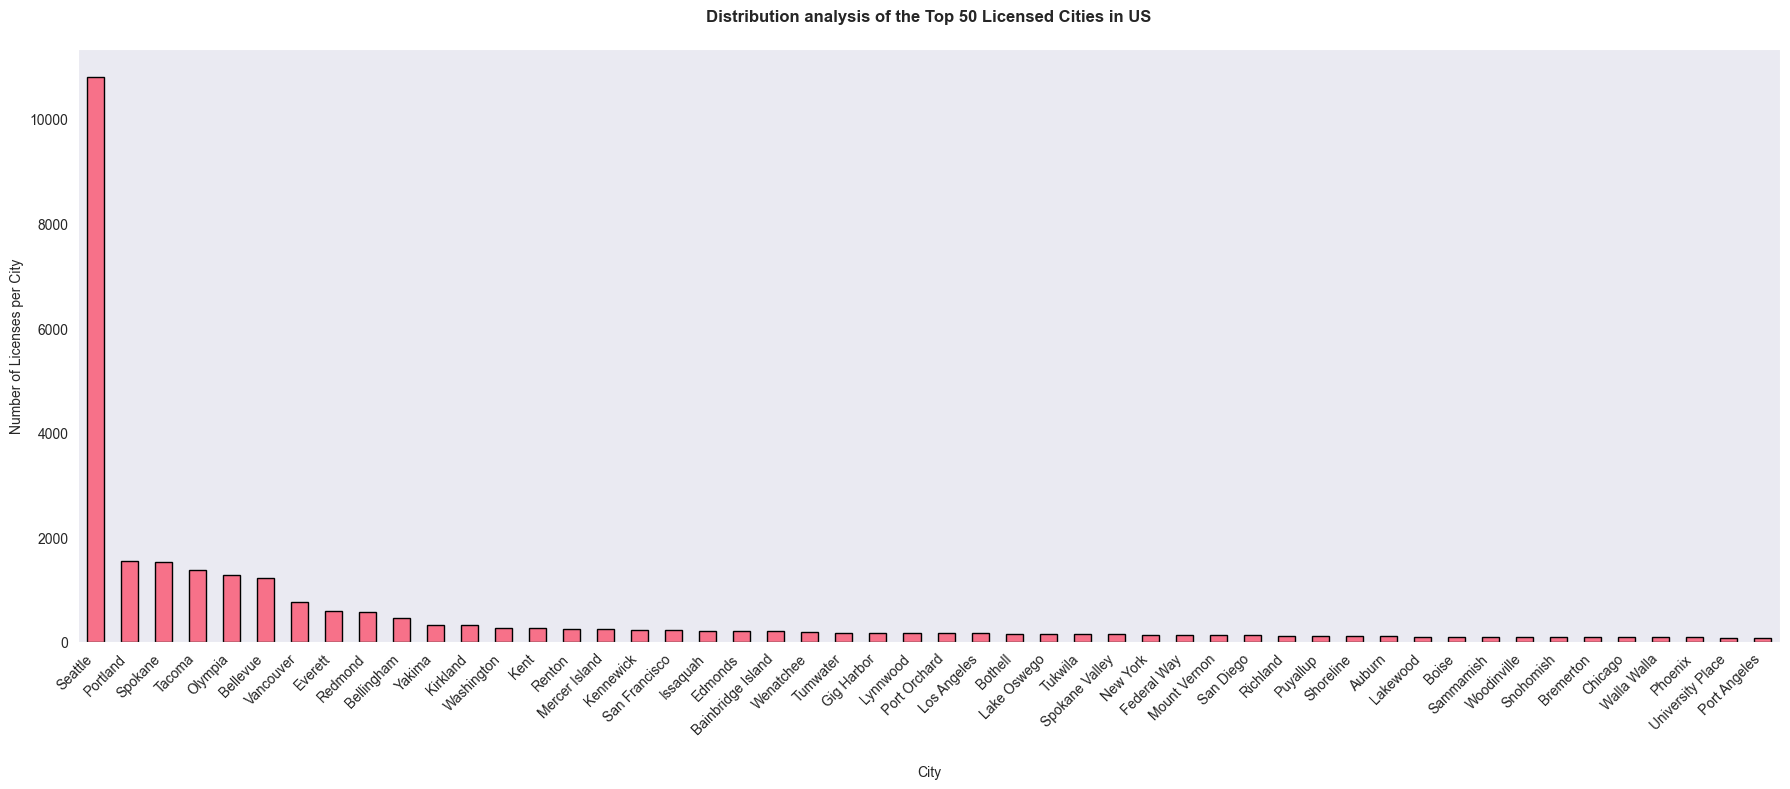

In [31]:
# Get an overview distribution of the top 50 lincesed States in US

distribution_count = df['city'].value_counts().head(50)

plt.figure(figsize=(18,8))
distribution_count.plot(kind='bar',edgecolor='black')
plt.title('Distribution analysis of the Top 50 Licensed Cities in US', pad=20,fontweight='bold')
plt.xlabel('City', labelpad=20)
plt.ylabel('Number of Licenses per City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Market Segment of Lawyers per City by Size:
The bar chart reveals a heavy concentration in some cities, such as Seattle, and highlights a low concentration in cities like Port Angeles. To make this insight actionable, we have classified all cities into categories based on tier levels, representing the distribution from top to lower-tier cities. This allows for a tiered marketing approach and strategies tailored for return on investment (ROI). The refined analysis will be visualized in an enhanced bar chart.

## Category Analysis: Geographic Distribution

In [32]:
# Determine the categories using Absolute Thresholds
# The 75% quantile did not have a spread in the middle range. 

city_counts = df['city'].value_counts()

def categorize_city(city):
    count = city_counts.get(city, 0)
    if count >= 1000:
        return 'top_cities'
    elif count >= 100:
        return 'high_cities'
    elif count >= 50:
        return 'medium_cities'
    elif count >= 1:
        return 'low_cities'
    else:
        return 'below_1'

# create a new column and apply categorization
df['city_category'] = df['city'].apply(categorize_city)

In [33]:
# Create a summary table for geographic analysis
city_lawyer_counts = df.groupby(['city', 'city_category']).size().reset_index(name='lawyer_count')

# Create the geographic summary
geographic_summary = city_lawyer_counts.groupby('city_category').agg(
    City_Count=('city', 'size'),
    Total_Lawyers=('lawyer_count', 'sum'),
).reset_index()

print("Geographic Distribution Summary:")
print(geographic_summary.round(2))

Geographic Distribution Summary:
   city_category  City_Count  Total_Lawyers
0    high_cities          33           7571
1     low_cities        1663           6401
2  medium_cities          36           2457
3     top_cities           6          17753


##### Brief Summary on geographic distribution:

The US city board for lawyers is categorised using Absolute Thresholds, as the standard 75% quantile method was not effective and failed to reveal the true distribution for tier-based grouping. The analysis highlights a significant concentration of legal professionals in a few key areas.

The categories reveal the following insights:

1. **Top Tiers (`top_cities`):** Market concentration is extremely high in this segment. With just 6 cities that contains over 17,753 lawyers, representing the largest pool of professionals. This indicates that major urban centers are the primary hubs for legal practices.
2. **High-Growth Markets (`high_cities`):** This tier consists of 33 cities and the second-largest group of lawyers, totaling 7,571. These cities represent significant secondary markets with great opportunities.
3. **The Long Tail (`low_cities`):** This category is the most fragmented. While it accounts for 6,401 lawyers, they are spread across a vast number of 1,663 distinct cities. This "long-tail" distribution signifies that while the total number of lawyers is high, the density per city is very low, suggesting a different strategic approach is needed for these areas.
4. **Niche Segments (`medium_cities`):** Comprising 36 cities with 2,457 lawyers, this tier represents smaller, niche markets that may offer specialized opportunities.

In essence, the legal market is heavily skewed towards a few top-tier cities, with a significant drop-off in lawyer density as you move to smaller cities.

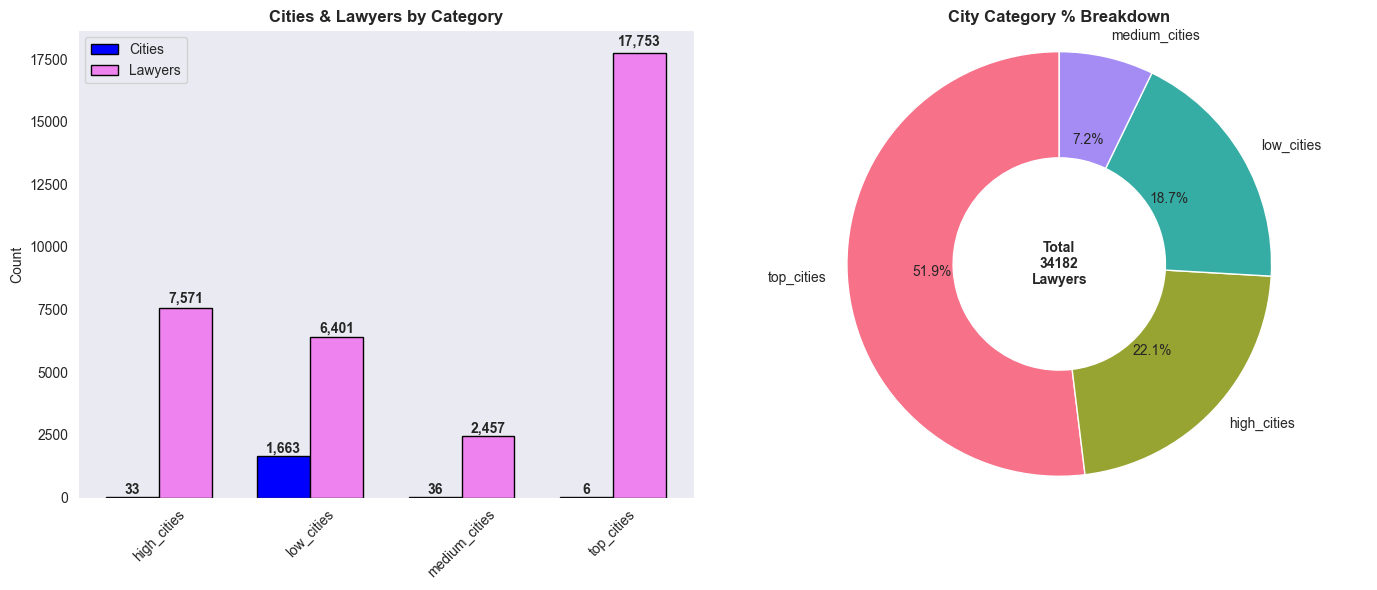

In [34]:
category_counts = df['city_category'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Define a color palette for consistency
colors = sns.color_palette('husl', len(category_counts))

# 1) Grouped bar chart: Number of Cities vs Total Lawyers
cats = geographic_summary['city_category']
x = np.arange(len(cats))
w = 0.35

ax1.bar(x - w/2, geographic_summary['City_Count'], width=w, label='Cities', color='blue', edgecolor='black')
ax1.bar(x + w/2, geographic_summary['Total_Lawyers'], width=w, label='Lawyers', color='violet',edgecolor='black')
ax1.set_xticks(x)
ax1.set_xticklabels(cats, rotation=45)
ax1.set_ylabel('Count')
ax1.set_title('Cities & Lawyers by Category', fontweight='bold')
ax1.legend()

# annotate
for rect in ax1.patches:
    h = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2, h*1.01, f'{int(h):,}',
             ha='center', va='bottom', fontweight='bold')

# 2) Donut chart: category %
wedges, texts, autotexts = ax2.pie(
    category_counts.values,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.5),
    colors=colors
)
ax2.set_title('City Category % Breakdown', fontweight='bold')
ax2.axis('equal')


# total in center
ax2.text(0, 0, f'Total\n34182\nLawyers', 
         ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


### Category Analysis on Market Segment 

- The analysis reveals that the legal market is not uniform; instead, it is highly segmented by city size.
- This tiered structure has significant implications for marketing strategy, resource allocation, and expected ROI.  A one-size-fits-all marketing 
  approach  would be highly inefficient.
- The extreme concentration of lawyers in top_cities means these markets are high-value but also likely high-competition.
- Conversely, the low_cities category represents a "long tail" market where traditional, high-touch marketing efforts would be cost-prohibitive due to the low density
  of lawyers.

## Professional Status:

In [35]:
# Determine other status under column 'status'
# Created a usage function for periodic update on the dataset

data_array = df['status'].unique() 

def check_for_status(status_to_find):

    if status_to_find in data_array:
        print(f"Status '{status_to_find}' was found.")
    else:
        print(f"Status '{status_to_find}' was not found.")
        
# check for'inactive'
check_for_status('inactive')

# Check for 'cancelled' status
check_for_status('cancelled')

# check for 'pending' status
check_for_status('pending')


Status 'inactive' was not found.
Status 'cancelled' was not found.
Status 'pending' was not found.


### Professional Status Analysis:

- A critical aspect of the dataset is the professional standing of the lawyers. The analysis confirms that all 34,182 lawyers listed are marked as **'Active'**.

- To ensure data quality and completeness, checks for other potential statuses such as 'inactive,' 'cancelled,' or 'pending' were performed. None of these alternative statuses were found in the dataset.

- This uniformity indicates a clean, highly reliable dataset for outreach and marketing campaigns, as every individual listed is a currently practicing legal professional. The absence of inactive or pending statuses simplifies segmentation and targeting, allowing for a focused approach on fully licensed lawyers.

## Strategic Implications for Lead Generation

In [36]:
city_counts_df = df.groupby(['city_category','city']).size().unstack(fill_value=0).T

city_counts_df['Total'] = city_counts_df.sum(axis=1)
city_counts_df.sort_values('Total', inplace=True)

print("Top 10 Cities per each tier category:")


print("\n--- Top Cities ---")
print(city_counts_df['top_cities'].nlargest(10))

print("\n--- High Cities ---")
print(city_counts_df['high_cities'].nlargest(10))

print("\n--- Medium Cities ---")
print(city_counts_df['medium_cities'].nlargest(10))

print("\n--- Low Cities ---")
print(city_counts_df['low_cities'].nlargest(10))

pd.reset_option('display.max_rows')

Top 10 Cities per each tier category:

--- Top Cities ---
city
Seattle         10801
Portland         1549
Spokane          1532
Tacoma           1373
Olympia          1274
Bellevue         1224
Wood Village        0
Woodburn            0
Allyn               0
Aloha               0
Name: top_cities, dtype: int64

--- High Cities ---
city
Vancouver        760
Everett          579
Redmond          570
Bellingham       444
Yakima           323
Kirkland         322
Washington       253
Kent             251
Renton           245
Mercer Island    236
Name: high_cities, dtype: int64

--- Medium Cities ---
city
Lakewood            96
Boise               95
Sammamish           92
Woodinville         91
Bremerton           90
Snohomish           90
Chicago             86
Walla Walla         84
Phoenix             79
University Place    78
Name: medium_cities, dtype: int64

--- Low Cities ---
city
Scottsdale           48
Confidential         47
Pasco                47
Chehalis             46
Sacra

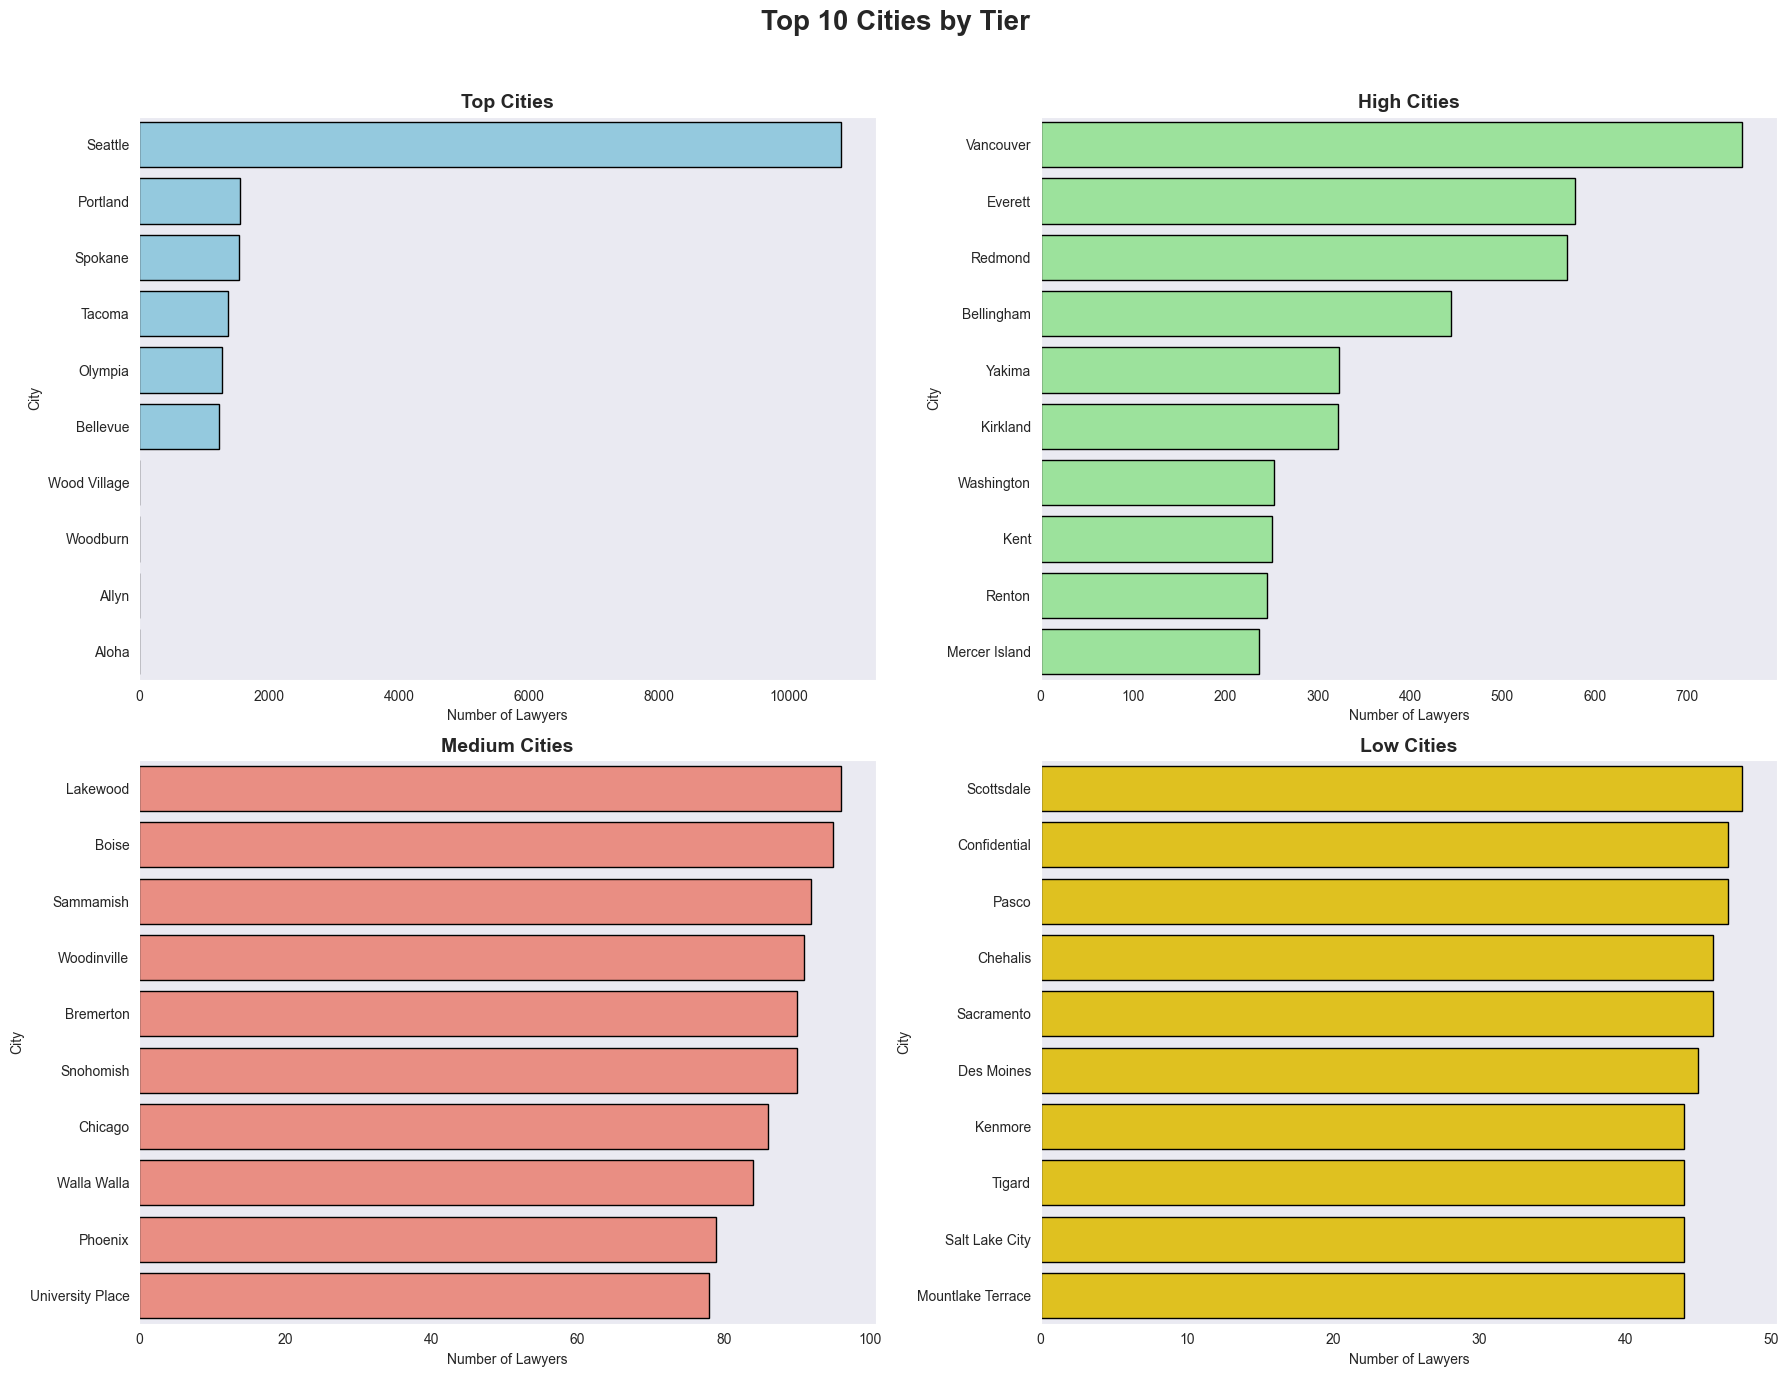

In [37]:

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Top 10 Cities by Tier', fontsize=20, fontweight='bold')

# Data for each tier
top_cities = city_counts_df['top_cities'].nlargest(10)
high_cities = city_counts_df['high_cities'].nlargest(10)
medium_cities = city_counts_df['medium_cities'].nlargest(10)
low_cities = city_counts_df['low_cities'].nlargest(10)

def plot_tier(ax, data, title, color):
    sns.barplot(x=data.values, y=data.index, ax=ax, color=color, edgecolor='black')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Number of Lawyers')
    ax.set_ylabel('City')

# Plot each tier
plot_tier(axes[0, 0], top_cities, 'Top Cities', 'skyblue')
plot_tier(axes[0, 1], high_cities, 'High Cities', 'lightgreen')
plot_tier(axes[1, 0], medium_cities, 'Medium Cities', 'salmon')
plot_tier(axes[1, 1], low_cities, 'Low Cities', 'gold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Conclusion

This analysis of the WBSA lawyer registration dataset provides a clear and actionable overview of the legal market landscape. The key takeaways and strategic recommendations are as follows:

### Summary

* **Data Processing Quality:** The dataset is cleaned, with no missing values and has a correct formatting.  The phone numbers have been standardized to the E.164 format, making them suitable for use in CRM (like Hubspot) and marketing automation systems.

* **Market Concentration Analysis:** The legal market is highly concentrated, with a small number of top-tier cities accounting for a large share of lawyers. This indicates that major urban centers are the primary hubs for legal practices.

* **Geographic Distribution:** The analysis reveals a tiered market structure, with cities categorized as top, high, medium, and low tiers based on the number of registered lawyers. This segmentation is crucial for developing targeted marketing strategies.

* **Professional Status:** All 34,182 lawyers in the dataset are listed as "Active," which simplifies outreach efforts and ensures that marketing campaigns are directed at currently practicing legal professionals.

* **Strategic Implications for Lead Generation:** The tiered market structure has significant implications for lead generation. A one-size-fits-all approach would be inefficient. Instead, a segmented strategy that tailors outreach efforts to the characteristics of each tier is recommended. Outreach efforts can be concentrated on the top cities within each tier, with strategies tailored to the geographic distribution of legal professionals

### Recommendations

1. **Top-Tier Cities:** These high-value markets are likely to be highly competitive. A targeted, high-touch marketing approach is recommended, focusing on building relationships and establishing a strong brand presence.

2. **High-Tier Cities:** These cities represent significant growth opportunities. A balanced approach that combines digital marketing with targeted outreach is recommended to capture market share.

3. **Medium-Tier Cities:** These smaller, niche markets may offer specialized opportunities. A cost-effective, digital-first approach is recommended, focusing on content marketing and social media to build awareness and generate leads.

4. **Low-Tier Cities:** The "long tail" of the market requires a scalable, low-cost approach. Automated email campaigns and digital advertising are recommended to reach this fragmented audience.

By implementing a segmented marketing strategy that aligns with the tiered structure of the legal market, it is possible to optimize resource allocation, maximize ROI, and achieve sustainable growth.